In [83]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

figure有一些选项，figsize 大小和纵横比

In [84]:
# 获取当前figure的引用
# plt.gcf()

In [85]:
# figure不能直接绘图，绘图需要用add_subplot创建一个或多个subplot才行
# 在两行两列的四个ax中，选中第一个（变号从1开始）
ax1 = fig.add_subplot(221)
ax1.plot([1,2,3],[1,2,3])
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
# 此时发出绘图命令，就会在最后一个用过的subplot中绘图
ax3.plot(np.random.randn(50).cumsum(),'k--')
plt.show()


k-- 是一个线性选项，告诉plt 绘制黑色虚线，fig.add_subplot返回的是axessubplot对象

直接调用其实例方法就可以在其表示的格子中画图了

In [86]:
ax1.hist(np.random.randn(100),bins=10,color='k',alpha=0.3)

(array([ 1.,  5.,  3., 14., 15., 19., 19., 10., 10.,  4.]),
 array([-2.94953596, -2.42912514, -1.90871432, -1.38830349, -0.86789267,
        -0.34748184,  0.17292898,  0.6933398 ,  1.21375063,  1.73416145,
         2.25457227]),
 <a list of 10 Patch objects>)

In [87]:
ax2.scatter(np.arange(30),np.arange(30)+3*np.random.randn(30))
plt.show()

根据特定的布局创建figure 和 subplot 是一个非常常见的任务，于是出现了一个更为方便的方法 plt.subplts,可以创建一个新的figure，返回一个还有已创建的subplot对象的numpy数组

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001ED466515C0>,
      dtype=object)

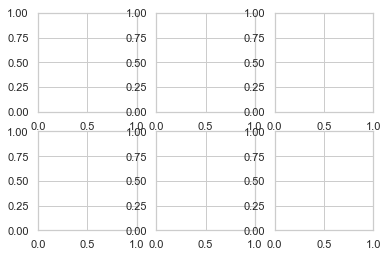

In [88]:
fig,axes = plt.subplots(2,3)
axes

In [89]:
# 可通过axes[i,j]获取目标axes
axes[1,1]

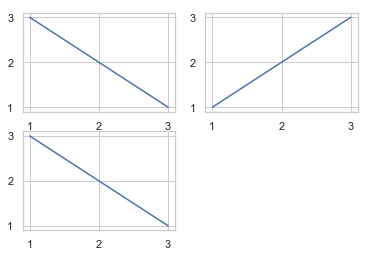

In [90]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(221)
ax1.plot([1,2,3],[3,2,1])
ax2 = fig.add_subplot(222)
ax2.plot([1,2,3],[1,2,3])
ax3 = fig.add_subplot(223)
ax3.plot([1,2,3],[3,2,1])
plt.show()

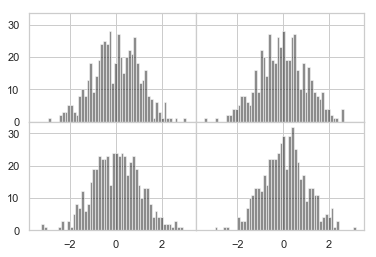

In [91]:
# wspach和hspace是控制高度和宽度的百分比，用作subplot之间的间距
# 下面将间距收到0
fig, axes = plt.subplots(2,2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.randn(500),bins=50,color='k',alpha=0.5)
plt.subplots_adjust(wspace=0,hspace=0)

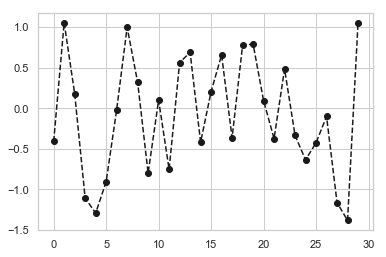

In [92]:
plt.plot(np.random.randn(30),color='k', linestyle='dashed', marker='o')

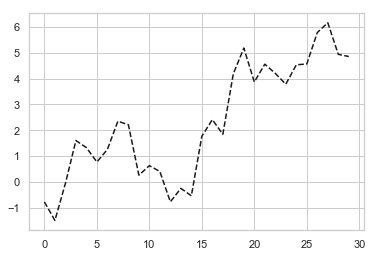

In [93]:
data = np.random.randn(30).cumsum()
plt.plot(data,'k--', label='Default')

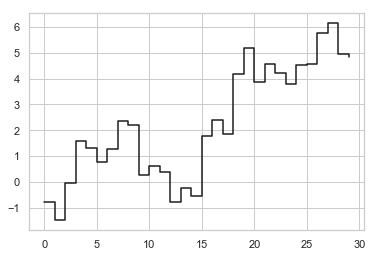

In [94]:
plt.plot(data,'k-', drawstyle='steps-post')

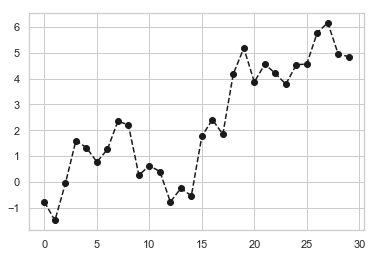

In [95]:
plt.plot(data,color='k', linestyle='dashed', marker='o')

(0.0, 1.0)

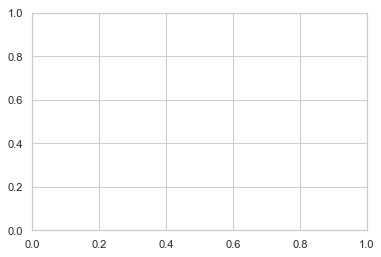

In [96]:
plt.xlim()

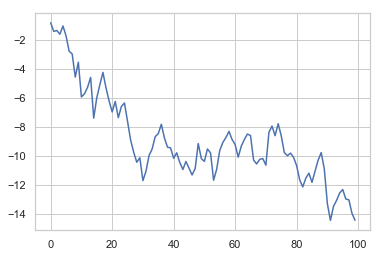

In [97]:
fig = plt.figure();ax = fig.add_subplot(1,1,1)
# 在坐标轴上绘图
ax.plot(np.random.randn(100).cumsum())

要修改x轴的刻度，最简单的办法是使用set_xticks和set_xticklabels

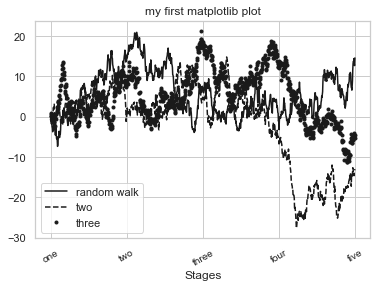

In [98]:
# 创建一个随机漫步
# 创建画板
fig = plt.figure()
# 创建绘图区
ax = fig.add_subplot(1,1,1)
# 设置刻度值
ticks = ax.set_xticks([0,250,500,750,1000])
# 设置刻度值对应表示
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                           rotation=30, fontsize='small')
# 设置标题
ax.set_title('my first matplotlib plot')
# 设置x轴标签
ax.set_xlabel('Stages')
# label是对应图线的标签，后面需要添加legend函数才能显示出来
ax.plot(np.random.randn(1000).cumsum(),'k',label='random walk')
# ax.legend()或plt.legend()


ax.plot(np.random.randn(1000).cumsum(),'k--',label='two')

ax.plot(np.random.randn(1000).cumsum(),'k.',label='three')


ax.legend()

(600, 1800)

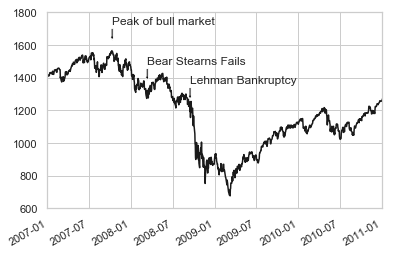

In [99]:
from datetime import datetime
import pandas as pd


fig = plt.figure()
ax = fig.add_subplot(111)




data = pd.read_csv('./spx.csv',index_col=0,parse_dates=True)
spx = data['SPX']



crisis_data = [(datetime(2007, 10, 11), 'Peak of bull market'),
               (datetime(2008, 3, 12), 'Bear Stearns Fails'),
               (datetime(2008, 9, 15), 'Lehman Bankruptcy') ]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2,headlength=4),
                horizontalalignment='left', verticalalignment='top')
    


    
    
    
spx.plot(ax=ax,style='k-')

# 轴的缩放需放在绘图函数之后
# Zoom in on 2007-2010 
ax.set_xlim(['1/1/2007', '1/1/2011']) 
ax.set_ylim([600, 1800])

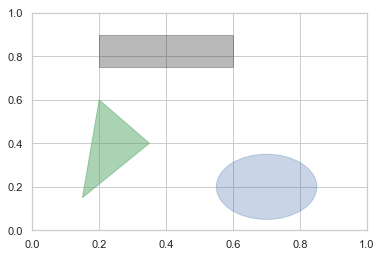

In [100]:
fig = plt.figure() 
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3) 
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],color='g', alpha=0.5)

ax.add_patch(rect) 
ax.add_patch(circ) 
ax.add_patch(pgon)

In [101]:
# 将图表保存到文件
# 利用plt.savefig 可将当前图表保存到文件
# 该方法相当于figure实例方法 savefig
# 例：将图表保存为svg图形
plt.savefig('./fig_test.jpg')

<Figure size 432x288 with 0 Axes>

In [102]:
fig.savefig('./fig_test.jpg')

pandas绘图

In [103]:
import pandas as pd

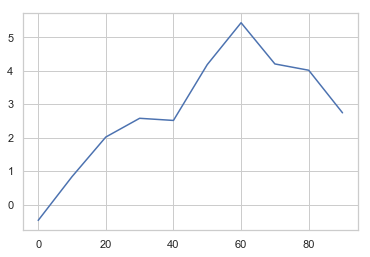

In [104]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0,100,10))
#  Series object’s index is passed to matplotlib for plotting on the x-axis
#  disable this by passing use_index=False
s.plot()

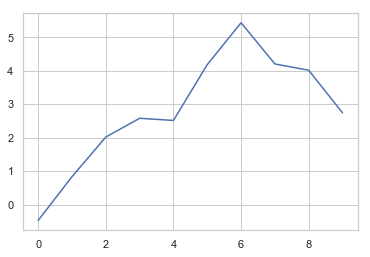

In [105]:
s.plot(use_index=False)

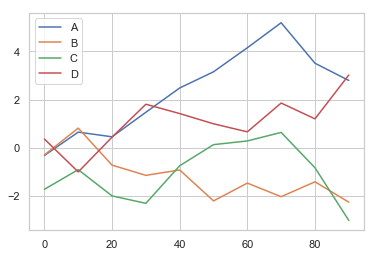

In [106]:
df = pd.DataFrame(np.random.randn(10,4).cumsum(0),
                 columns=['A','B','C','D'],
                 index=np.arange(0,100,10))
df.plot()

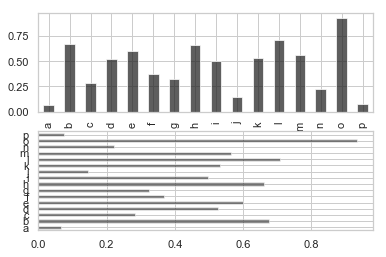

In [107]:
fig,axes = plt.subplots(2,1)
data = pd.Series(np.random.rand(16),index=list('abcdefghijklmnop'))
data.plot.bar(ax = axes[0], color='k', alpha=0.7)
data.plot.barh(ax = axes[1], color='k', alpha=0.5)

In [108]:
data

a    0.067504
b    0.674818
c    0.284511
d    0.525708
e    0.598098
f    0.369154
g    0.324669
h    0.661856
i    0.498163
j    0.146021
k    0.531216
l    0.706625
m    0.563128
n    0.221508
o    0.933421
p    0.076122
dtype: float64

In [109]:
df = pd.DataFrame(np.random.rand(6,4),
                 index = ['one', 'two', 'three', 'four', 'five', 'six'],
                 columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.511158,0.018261,0.706474,0.340305
two,0.771296,0.225102,0.182294,0.246630
three,0.627402,0.547767,0.321093,0.961044
four,0.697151,0.423459,0.448845,0.204104
five,0.056899,0.720375,0.372319,0.657107
six,0.192322,0.762675,0.205193,0.686036


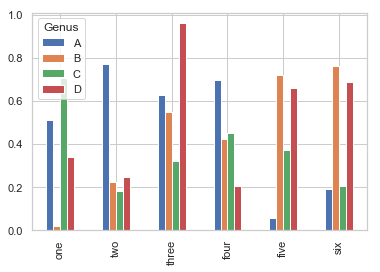

In [110]:
df.plot.bar()

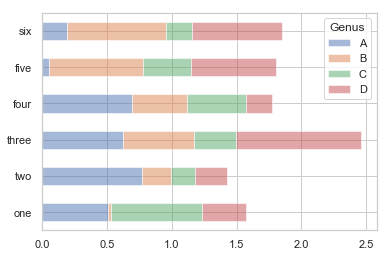

In [111]:
df.plot.barh(stacked=True,alpha=0.5)

In [112]:
tips = pd.read_csv('./tips.csv')
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [113]:
party_counts = pd.crosstab(tips['day'],tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


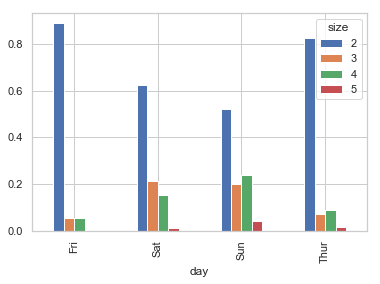

In [114]:
party_counts = party_counts.loc[:,2:5]
party_pcts = party_counts.div(party_counts.sum(1),axis=0)
party_pcts.plot.bar(grid=True)

In [115]:
import seaborn as sns

In [116]:
tips['tip_pct'] = tips['tip']/(tips['total_bill']-tips['tip'])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


C:\Users\Dell\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


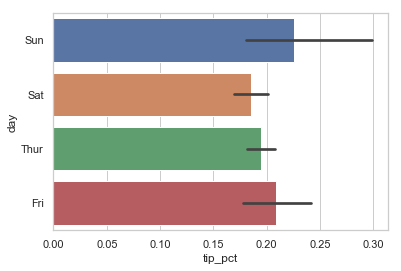

In [117]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

C:\Users\Dell\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


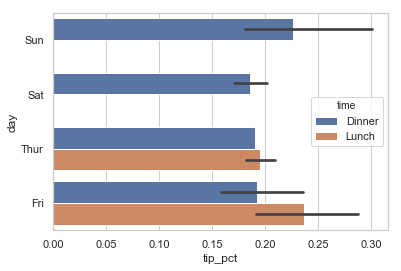

In [118]:
# You can switch between different plot appearances using seaborn.set
sns.set(style='whitegrid')


# seaborn.barplot has a hue option that enables us to split by an additional categorical value
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')